    
<p style="text-align:center ; background-color:#F0FFF0;">
     <a href="https://github.com/MoustafaMaher-cyber" target="_blank" >    
     <img src="website.pngىة.png" width="250" alt="Mustafa Maher Logo" align="center" />   
     </a>
</p>

In [1]:
# making a function retrive the longest common prfix of two seqances
def longestCommonPrefix(s1,s2):
    i=0
    while i<len(s1) and i<len(s2) and s1[i]==s2[i]:
        i+=1
    return s1[:i]

In [2]:
import random
seq=''
for _ in range(10):
    seq+=random.choice('ACGT')
print(seq)

TATAATTCGG


In [3]:
seq1 = ''.join([random.choice('ACGT') for _ in range(20)])
print(seq1)

GCGAACCCCTGTCTGCCACC


In [4]:
longestCommonPrefix(seq,seq1)

''

In [5]:
# making a function retrive the longest suffix of two sequance
def longestsufix(s1,s2):
    i=-1
    while s1[i]==s2[i]:
        i-=1
        if i+len(s1)==0 or i+len(s2)==0:
            if len(s1)>=len(s2):
                return s2
            else:
                return s1
    return s1[i+1:] 

In [6]:
longestsufix(seq,seq1)

'TATAATTCGG'

In [7]:
# making a function returns the revrse complement of a seq
def reverseComplement(s):
    complement={'A':'T','T':'A','G':'C','C':'G' , 'N':'N'}
    t=''
    for base in s:
        t = complement[base] + t
    return t

In [8]:
reverseComplement('ATGC')

'GCAT'

In [9]:
# making a function to read a fasta file containing a sequance
def readGenom(filename):
    genome=''
    with open(filename,'r') as f:
        for line in f:
            if not line[0]=='>':
                genome+= line.rstrip()
    return genome

In [10]:
genome=readGenom('lambda_virus.fa')

In [11]:
genome[0:10]

'GGGCGGCGAC'

In [12]:
# making a function to read fastq files
def readFastq(file):
    seqeance=[]
    qualities = []
    with open(file,'r') as fh:
        while True:
            fh.readline()
            seq=fh.readline().rstrip()
            fh.readline()
            qual=fh.readline().rstrip()
            if len(seq) == 0:
                break
            seqeance.append(seq)
            qualities.append(qual)
    return seqeance , qualities
seqs , quals = readFastq('SRR835775_1.first1000.fastq')

In [13]:
seqs[0]

'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC'

In [14]:
quals[0]

'???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################'

In [15]:
# making a function returning number of GC bases in a sequance and the position of each one
def findGCByPos(reads):
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'G' or read[i] == 'C':
                gc[i]+=1
            totals[i]+=1
    for i in range(len(gc)):
        if totals[i]>0:
            gc[i]/=float(totals[i])
    return gc

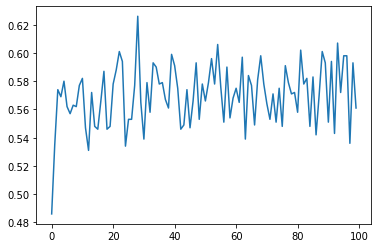

In [16]:
import matplotlib.pyplot as plt
gc = findGCByPos(seqs)
plt.plot(range(len(gc)),gc)
plt.show()

In [17]:
# implementing navie algorithm for finding maches between two sequances
'''
 It compares first character of pattern with searchable text. If match is found,append the match index to a list . 
 If match not found, counter of text is incremented to the next character.
 This process is repeated until the end of the text.
'''
def naive(p,t):
    occuerances = []
    for i in range(len(t)-len(p)+1):
        match=True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match=False
                break
        if match:
            occuerances.append(i)
    return occuerances

In [18]:
t = 'AGCTTAGATAGC'
p = 'AG'
naive(p, t)

[0, 5, 9]

In [19]:
t[0:2],p[0:2]

('AG', 'AG')

In [20]:
t[5:7],p[0:2]

('AG', 'AG')

In [21]:
t[9:11],p[0:2]

('AG', 'AG')

In [22]:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. 
        creating an empty list of reads , get the start point randomly 
        by picking a num between 0 and the differance between the genome length and the read length - 1,
        we get the read from strart point untill we reach the length of the expected reag 
        then append it to the reads
    '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [23]:
genome=readGenom('phix.fa')
reads = generateReads(genome,100,100)
nummatch=0
for r in reads:
    matchs= naive(r , genome)
    if len(matchs) > 0:
        nummatch+=1
print('%d / %d reads matched the genome exactly!' % (nummatch, len(reads)))

100 / 100 reads matched the genome exactly!


In [24]:
def naive_with_rc(reads,genome):
    '''
     Here we giving naive searching algorthim the ability to search for the reverse complement of the reads
     with its ability to search for straightforward complement, 
     it will return the occuerances of normal seq or its complement.
    '''
    numMatched = 0
    n=0
    for r in reads:
        matchs=naive(r,genome)
        matchs.extend(naive(reverseComplement(r),genome))
        n+=1
        if len(matchs)>0:
            numMatched+=1
    return numMatched

In [25]:
# ordinary naive search algorthim
def naive1(reads,genome):
    numMatched = 0
    n=0
    for r in reads:
        matchs=naive(r,genome)
        n+=1
        if len(matchs)>0:
            numMatched+=1
    return numMatched

In [26]:
genome=readGenom('lambda_virus (1).fa')

In [27]:
naive_with_rc('AGGTCCGT',genome)

8

In [28]:
naive1('AGGTCCGT',genome)

8

In [29]:
def naive_2mm(p, t,n):
    '''
     modifing naive search giving one condition if mismatching exceted a number n it will break returning the maches before.
    '''
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        mismatches = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatches += 1
                if mismatches > n:
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [30]:
n1=naive_2mm('AGGTCCGT',genome,1)
len(n1)

11

In [31]:
n2=naive_2mm('AGGTCCGT',genome,2)
len(n2)

140

In [32]:
def naive_with_rc_first(p, t):
    """First, implement a version of the naive exact matching algorithm that is strand-aware. 
    That is, instead of looking only for occurrences of P in T, additionally look for occurrences of the reverse 
    complement of P in T. If P is ACT, your function should find occurrences of both ACT and its reverse complement AGT in T."""
    occurrences = naive(p, t)
    more_occurenences = naive(reverseComplement(p), t)
    return occurrences + more_occurenences

In [33]:
def naive_with_rc_then(p, t):
    """If P and its reverse complement are identical (e.g. AACGTT), then a given match offset 
    should be reported only once. So if your new function is called naive_with_rc, then the old naive 
    function and your new naive_with_rc function should return the same results when P equals its reverse complement."""
    occurrences = naive(p, t)
    revP = reverseComplement(p)
    if p == revP:
        return occurrences
    else:
        more_occurenences = naive(revP, t)
        return occurrences + more_occurenences

In [34]:
# shorter implementation of naive with reverce complement algo.
def naive_with_rc(p, t):
    return naive_with_rc_then(p, t)

<p>Boyer Moore algorithm  preprocesses the pattern. 
Boyer Moore is a combination of the following two approaches. 
</p>
<ul>
    <li>Bad Character Rule </li>
    <li>Good Suffix Rule </li>
</ul>
<p>
Both of the above roles can also be used independently to search a pattern in a text. Let us first understand how two independent approaches work together in the Boyer Moore algorithm. If we take a look at the Naive algorithm, it slides the pattern over the text one by one.The Boyer Moore algorithm processes the pattern and creates different arrays for each of the two roles. At every step, it slides the pattern by the max of the slides suggested by each of the two roles. So it uses greatest offset suggested by the two roles at every step.Boyer Moore algorithm starts matching from the last character of the pattern.
</p>    

###  Bad Character Rule
<p>
    The idea of bad character role is simple. The character of the text which doesn’t match with the current character of the       pattern is called the Bad Character. Upon mismatch, we shift the pattern until – </p> 
<ul>
    <li>The mismatch becomes a match.</li>
    <li>Pattern P moves past the mismatched character.</li>
</ul> 

#### Case 1 – Mismatch become match 
<p>
    We will lookup the position of the last occurrence of the mismatched character in the pattern, and if the mismatched character exists in the pattern, then we’ll shift the pattern such that it becomes aligned to the mismatched character in the text T. 
</p>
<img src="bad_match_role_case_1.jpg" width="500" alt="Mustafa Maher Logo" align="center" />

#### Case 2 – Pattern move past the mismatch character 
<p>We’ll lookup the position of last occurrence of mismatching character in pattern and if character does not exist we will shift pattern past the mismatching character</p>
<img src="bad_match_role_case_2.jpg" width="500" alt="Mustafa Maher Logo" align="center" />

### Good Suffix Rule

Let t be substring of text T which is matched with substring of pattern P. Now we shift pattern until :
1) Another occurrence of t in P matched with t in T.
2) A prefix of P, which matches with suffix of t
3) P moves past t

#### Case 1: Another occurrence of t in P matched with t in T
Pattern P might contain few more occurrences of t. In such case, we will try to shift the pattern to align that occurrence with t in text T. For example-
<img src="1-36.jpg" width="500" alt="Mustafa Maher Logo" align="center" />

#### Case 2: A prefix of P, which matches with suffix of t in T
<p>It is not always likely that we will find the occurrence of t in P. Sometimes there is no occurrence at all, in such cases sometimes we can search for some suffix of t matching with some prefix of P and try to align them by shifting P. For example –</p>
<img src="2-32.jpg" width="500" alt="Mustafa Maher Logo" align="center" />

#### Case 3: P moves past t
<p>If the above two cases are not satisfied, we will shift the pattern past the t. For example –</p>
<img src="3-19.jpg" width="500" alt="Mustafa Maher Logo" align="center" />

the following functions are a basic functions used for boyer moore algorithm 
reference: Gusfield, Dan. Algorithms on strings, trees and sequences: computer science and computational biology. Cambridge university press, 1997.

In [38]:
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab
    

<p>
    Here we will create a class BoyerMoore which contains three main functions (bad_character_rule,good_suffix_rule and match_skip)
</p>

In [39]:
class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [40]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [41]:
t = 'GCTAGCTCTACGAGTCTA'
p = 'TCTA'
p_bm = BoyerMoore(p, alphabet='ACGT')

In [42]:
boyer_moore(p, p_bm, t)

[6, 14]

In [43]:
import bisect
import sys
'''
 Given two strings p and t, The task is to find if p is a substring of t. 
 If yes append index of match to offset list
 first we create a class index which contain query function which returns index list for first k-mer of P
'''
class Index(object):
    def __init__(self, t, k):
        ''' Create index from all substrings of size 'length' '''
        self.k = k  # k-mer length (k)
        self.index = []
        for i in range(len(t) - k + 1):  # for each k-mer
            self.index.append((t[i:i+k], i))  # add (k-mer, offset) pair
        self.index.sort()  # alphabetize by k-mer
    
    def query(self, p):
        ''' Return index hits for first k-mer of P '''
        kmer = p[:self.k]  # query with first k-mer
        i = bisect.bisect_left(self.index, (kmer, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != kmer:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [44]:
def queryIndex(p, t, index):
    k = index.k
    offsets = []
    for i in index.query(p):
        if p[k:] == t[i+k:i+len(p)]:  # verify that rest of P matches
            offsets.append(i)
    return offsets

In [45]:
t = 'ACTTGGAGATCTTTGAGGCTAGGTATTCGGGATCGAAGCTCATTTCGGGGATCGATTACGATATGGTGGGTATTCGGGA'
p = 'GGTATTCGGGA'

In [46]:
index = Index(t, 4)
print(queryIndex(p, t, index))

[21, 68]


In [47]:
'''
 approximate string matching  is the technique of finding strings that match a pattern approximately,
 first we divide the given string P into (n+1 -> not to overwrite the string t) sustrings 
 then setting start search index and end search index then making a BoyerMoore object from the start to the end
 then get the matches using boyer_moore function then check if every element of the matches is less than the start index 
 or the differance between the element and the start index from the last index of P string is greater than the length of string T
 if so we will continue to check the characters strating from index 0 till the start index if each character at each of these index in string p
 not equal the character of string t at index of element in matches - the start index + the index od that character if so 
 we will increase the mismatches by 1 tiil it reachs the limited number of mismatches then we will break if mismaches does not exceed
 the limited number we add the index of differance between the match element and the start index to a set of matches 
 finally we return the matches
'''
def approximate_match(p, t, n):
    segment_length = int(round(len(p) / (n+1)))
    all_matches = set()
    for i in range(n+1):
        start = i*segment_length
        end = min((i+1)*segment_length, len(p))
        p_bm = BoyerMoore(p[start:end], alphabet='ACGT')
        matches = boyer_moore(p[start:end], p_bm, t)
        # Extend matching segments to see if whole p matches
        for m in matches:
            if m < start or m-start+len(p) > len(t):
                continue
            mismatches = 0
            for j in range(0, start):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            for j in range(end, len(p)):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            if mismatches <= n:
                all_matches.add(m - start)
    return list(all_matches)

In [48]:
p = 'AACTTG'
t = 'CACTTAATTTG'
print(approximate_match(p, t, 2))

[0, 5]
